<a href="https://colab.research.google.com/github/ryantpham/Pokemon-EDA/blob/main/Pokemon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

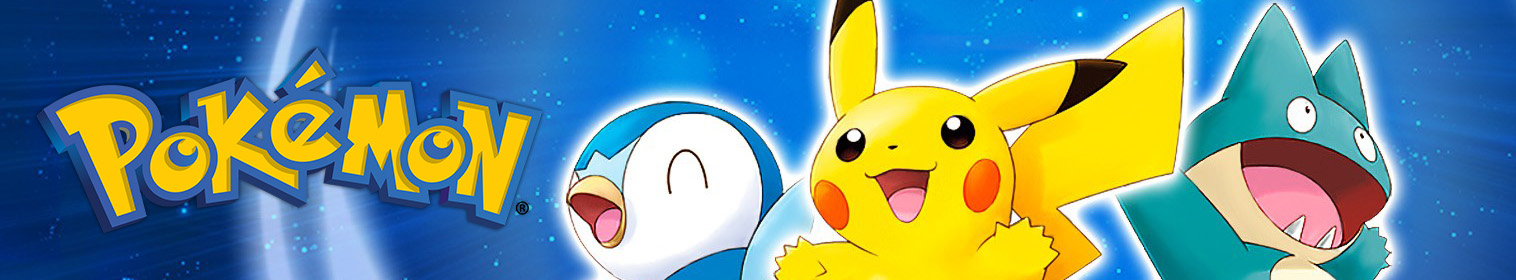

### Exploratory Data Analysis: Pokemon###
**In this project we will be:**
- Cleaning the data frame
- Visualizing the dataset
- Comparing the distribution of Pokemon types
- Analyzing all Pokemon Stats (e.g. Type, Generation, Attack, Defense, etc.)

**Column Descriptions:**
1. '#' - Pokedex Number
2. 'Name' - Name of the Pokemon
3. 'Type 1' - First type of the Pokemon
4. ' Type 2' - Second type of the Pokemon
5. 'Total' - Total stats of the Pokemon (Sum of HP, Attack, Defense, Sp. Atk, Sp. Def, Speed)
6. 'HP' - Total Hitpoints of a Pokemon
7. 'Attack' - Attack Stats of a Pokemon
8. 'Defense' - Defense stat of the Pokemon
9. 'Sp. Attack' - Special Attack stat of the Pokemon
10. 'Sp. Defense' - Special Defense stat of the Pokemon
11. 'Speed' - speed stat of the Pokemon
12. 'Generation' - What Generation the Pokemon is from
13. 'Legendary' - Is the Pokemon legendary (True or False)


**csv file:**
https://drive.google.com/file/d/1QXbQcXzpmMT9URIsPFiq4g1kfmog13NH/view?usp=sharing 

In [ ]:
#This cell loads the data
pokemon_raw = pd.read_csv('/content/drive/MyDrive/Pokemon Analysis Project/Dataset/Pokemon.csv')
pokemon_raw

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


###Data Cleaning####



In [ ]:
pokemon_raw.columns = pokemon_raw.columns.str.upper().str.replace('_', '')
pokemon_raw.head(n=10)

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [ ]:
print("There are a total of " + str(pokemon_raw.columns.size) + " columns in this dataset.")
pokemon_raw.columns

There are a total of 13 columns in this dataset.


Index(['#', 'NAME', 'TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE',
       'SP. ATK', 'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')

In [ ]:
#Check the unique values for 'NAME' to see If it is good enough to be set for index.
len(np.unique(pokemon_raw.get('NAME'))) == pokemon_raw.shape[0]

True

In [ ]:
pokemon = pokemon_raw.set_index('NAME').drop(columns = '#')
pokemon

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [ ]:
#Here we remove unwanted texts for the index of Pokemon names
pokemon.index = pokemon.index.str.replace(".*(?=Mega)", "")
pokemon.index = pokemon.index.str.replace(".*(?=Primal)", "")
pokemon.index = pokemon.index.str.replace(".*(?=Black)", "")
pokemon.index = pokemon.index.str.replace(".*(?=White)", "")


pokemon.head(n=10)

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [ ]:
#Since some pokemons don't have a second type we must fill in the NaN values with Type 1
pokemon.get('TYPE 2').fillna(pokemon.get('TYPE 1'), inplace = True)
pokemon.head(n=10)

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


**This will be the main data frame for further analysis.**

In [ ]:
print('Our main df:')
pokemon

Our main df:


,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


###Stats Analysis: Legendary Pokemon###

In [ ]:
pokemon

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [ ]:
#Summarized stats of the individual Pokemons
pokemon.describe().drop(columns = ['GENERATION'])

,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


**Pokedex**

In [ ]:
#We will create functions that will get the stats of a Pokemon, this will serve as our pokedex.
def pokemon_stats(name):
  return pokemon.loc[name]

def stronger_stats(poke1,poke2,column):
  attack1 = pokemon.loc[poke1].get(column)
  attack2 = pokemon.loc[poke2].get(column) 
  if attack1 >= attack2:
    return print(poke1 + ' has a higher '+ column.lower().capitalize() + ' stat than ' + poke2 + '.')
  else:
    return print(poke2 + ' has a higher '+ column.lower().capitalize() + ' stat than ' + poke1 + '.')

#These are the valid columns for testing
['TOTAL','HP','ATTACK','DEFENSE','SP. ATK', 'SP. DEF', 'SPEED']

['TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF', 'SPEED']

In [ ]:
#Function Tests
pokemon_stats('Lugia')

TYPE 1        Psychic
TYPE 2         Flying
TOTAL             680
HP                106
ATTACK             90
DEFENSE           130
SP. ATK            90
SP. DEF           154
SPEED             110
GENERATION          2
LEGENDARY        True
Name: Lugia, dtype: object

In [ ]:
stronger_stats('Charizard','Blaziken','ATTACK')

Blaziken has a higher Attack stat than Charizard.


**Legendary Pokemon Analysis**

In [ ]:
#Legendary Pokemons
is_legendary = pokemon[pokemon.get('LEGENDARY')==True]
is_legendary

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
Mewtwo,Psychic,Psychic,680,106,110,90,154,90,130,1,True
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [ ]:
is_legendary.shape[0]

65

In [ ]:
is_legendary.get('TYPE 1').value_counts()

Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Steel        4
Rock         4
Ground       4
Grass        3
Ghost        2
Ice          2
Normal       2
Dark         2
Flying       2
Fairy        1
Name: TYPE 1, dtype: int64

**Our next task will be to:**
 - Retrieve the top 5 Legendary Pokemons of a certain stat
 - Search for the strongest Pokemon in that category and insert it into the pokedex
 - Compare the strength differences between generations

In [ ]:
def top_5_legendary(column):
  return is_legendary.sort_values(by= column,ascending=False).head()

def weakest_5_legendary(column):
  return is_legendary.sort_values(by= column,ascending=True).head()

In [ ]:
#Top 5 Legendary Pokemons with the highest Attack
is_legendary.sort_values(by='ATTACK',ascending=False).head()

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
DeoxysAttack Forme,Psychic,Psychic,600,50,180,20,180,20,150,3,True
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Black Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True


In [ ]:
top_attack = np.array([is_legendary.sort_values(by='ATTACK',ascending=False).head().index])
print('The top 5 legendaries with the highest attacks are: '+str(top_attack))

The top 5 legendaries with the highest attacks are: [['Mega Mewtwo X' 'DeoxysAttack Forme' 'Mega Rayquaza' 'Primal Groudon'
  'Black Kyurem']]


In [ ]:
#Strongest Attack Legendary in Pokedex
pokemon_stats(top_attack.item(0))

TYPE 1         Psychic
TYPE 2        Fighting
TOTAL              780
HP                 106
ATTACK             190
DEFENSE            100
SP. ATK            154
SP. DEF            100
SPEED              130
GENERATION           1
LEGENDARY         True
Name: Mega Mewtwo X, dtype: object

In [ ]:
#Here we look at the weakest Attack Pokemon in comparison
weakest_5_legendary('ATTACK').iloc[0]

TYPE 1         Ice
TYPE 2         Ice
TOTAL          580
HP              80
ATTACK          50
DEFENSE        100
SP. ATK        100
SP. DEF        200
SPEED           50
GENERATION       3
LEGENDARY     True
Name: Regice, dtype: object

In [ ]:
#Top 5 Legendary Pokemons with the highest Defense
top_5_legendary('DEFENSE')

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Regirock,Rock,Rock,580,80,100,200,50,100,50,3,True
DeoxysDefense Forme,Psychic,Psychic,600,50,70,160,70,160,90,3,True
Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
Registeel,Steel,Steel,580,80,75,150,75,150,50,3,True


In [ ]:
top_defense = np.array([top_5_legendary('DEFENSE').index])
print('The top 5 legendaries with the highest attacks are: '+str(top_defense))

The top 5 legendaries with the highest attacks are: [['Regirock' 'DeoxysDefense Forme' 'Primal Groudon' 'Diancie' 'Registeel']]


In [ ]:
#Highest defense legendary in pokedex
pokemon_stats(top_defense.item(0))

TYPE 1        Rock
TYPE 2        Rock
TOTAL          580
HP              80
ATTACK         100
DEFENSE        200
SP. ATK         50
SP. DEF        100
SPEED           50
GENERATION       3
LEGENDARY     True
Name: Regirock, dtype: object

In [ ]:
#Lowest defense legendary comparison
weakest_5_legendary('DEFENSE').iloc[0]

TYPE 1        Psychic
TYPE 2        Psychic
TOTAL             600
HP                 50
ATTACK            180
DEFENSE            20
SP. ATK           180
SP. DEF            20
SPEED             150
GENERATION          3
LEGENDARY        True
Name: DeoxysAttack Forme, dtype: object

In [ ]:
#Top 5 Strongest Legendary Pokemons
top_5_legendary('TOTAL')

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Primal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


In [ ]:
top_total = np.array([top_5_legendary('TOTAL').index])
print('The top 5 legendaries with the highest attacks are: '+str(top_total))

The top 5 legendaries with the highest attacks are: [['Mega Mewtwo X' 'Mega Mewtwo Y' 'Mega Rayquaza' 'Primal Kyogre'
  'Primal Groudon']]


In [ ]:
#Overall strongest legendary Pokemon in Pokedex (There are multiple pokemons with the same stats)
top_5_legendary('TOTAL')[top_5_legendary('TOTAL').get('TOTAL') == top_5_legendary('TOTAL').get('TOTAL').max()]

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [ ]:
#Overall weakest legendary Pokemon in comparison
lowest_sorted = is_legendary.sort_values(by = 'TOTAL' , ascending = True)
overall_weak = lowest_sorted[lowest_sorted.get('TOTAL')== lowest_sorted.get('TOTAL').min()]
overall_weak

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
Azelf,Psychic,Psychic,580,75,125,70,125,70,115,4,True
Cobalion,Steel,Fighting,580,91,90,129,90,72,108,5,True
Terrakion,Rock,Fighting,580,91,129,90,72,90,108,5,True
Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
TornadusIncarnate Forme,Flying,Flying,580,79,115,70,125,80,111,5,True
TornadusTherian Forme,Flying,Flying,580,79,100,80,110,90,121,5,True
ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
Mesprit,Psychic,Psychic,580,80,105,105,105,105,80,4,True


In [ ]:
#There are 19 Pokemons with the lowest same stats
overall_weak.shape[0]

19

**Now, we compare the strength of the legegnedaries based on the generation they're from.**

In [ ]:
#Creates a function to compare the strength of legendaries between generation
def generation_strength(a,b):
  gen_df1 = is_legendary[is_legendary.get('GENERATION')==a]
  gen_df2 = is_legendary[is_legendary.get('GENERATION')==b]
  gen_a = gen_df1.get('TOTAL').mean()
  gen_b = gen_df2.get('TOTAL').mean()
  difference = np.abs(gen_a - gen_b).round(2)
  if gen_a >= gen_b:
    print('Legendaries from generation '+str(a) + ' is stronger than generation '+str(b)+' by an average of '+str(difference) + ' TOTAL points.')
  else: 
    print('Legendaries from generation '+str(b) + ' is stronger than generation '+str(a)+' by and average of '+ str(difference) + ' TOTAL points.')

#Checking the number of generations in this dataset
is_legendary.groupby('GENERATION').count().shape[0]

6

In [ ]:
#Function Tests
generation_strength(1,6)

Legendaries from generation 1 is stronger than generation 6 by an average of 20.83 TOTAL points.


In [ ]:
generation_strength(2,4)

Legendaries from generation 4 is stronger than generation 2 by and average of 14.62 TOTAL points.


In [ ]:
generation_strength(3,5)

Legendaries from generation 3 is stronger than generation 5 by an average of 30.22 TOTAL points.


After comparing the strength of the Pokemons between generations, we found ourselves to be curious if there is a relation between SPEED/ATTACK stats vs. SPEED/DEFENSE stats for these legendaries.

**Let's visualize the relation of Speed to the Attack/Defense stats of legendary Pokemons**

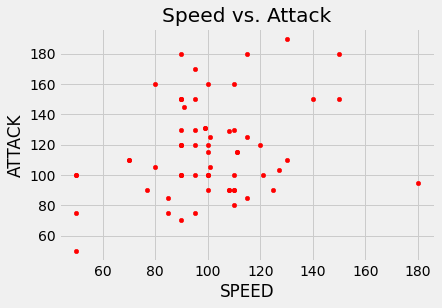

In [ ]:
is_legendary.plot(kind='scatter', x = 'SPEED', y = 'ATTACK', color = 'red', title = 'Speed vs. Attack')

We can see an upwards trend in Attack as Speed increases.

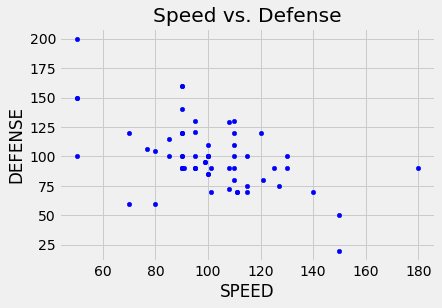

In [ ]:
is_legendary.plot(kind='scatter', x = 'SPEED', y = 'DEFENSE', color = 'blue', title = 'Speed vs. Defense')

We can see a downwards trend for Defense as speed increases.

###Summary: Legendaries###
- There are a total of 65 legendary Pokemons
- Psychic types are the most common with 14 different legendary Pokemons.
- Fairy types are the most unique with only 1 legendary.
- The legendary with the highest attack stat is Mega Mewtwo X, the weakest is Regice.
- The legendary with the highest defense stat is Regirock, the weakest is DeoxysAttack Forme.
-There are a total of 3 legendaries who share the same highest scoring total stats at 780 points (Mega Mewtwo X, Mega Mewtwo Y, Mega Rayquaza).
- There are a total of 19 legendaries who share the same lowest scoring total stats at 580 points.
- Based on our comparison of Speed to Attack/Defense we can conclude that legendaries with a higher Attack are faster than those with a higher Defense.

###Data Visualization: All Stats Analysis###

**In the previous cell we have used a scatter plot to only visualize legendary Pokemons. Now, Lets do the same but for non-legendary pokemons.**

In [ ]:
non_legendary = pokemon[pokemon.get('LEGENDARY')==False]
non_legendary

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
Bergmite,Ice,Ice,304,55,69,85,32,35,28,6,False
Avalugg,Ice,Ice,514,95,117,184,44,46,28,6,False


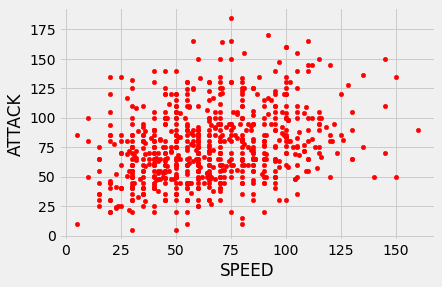

In [ ]:
non_legendary.plot(kind='scatter', x = 'SPEED', y='ATTACK', color = 'red' )

Although there are a lot of clustering, we are still able to see a slight shift upwards in in Attack as Speed stat increases.

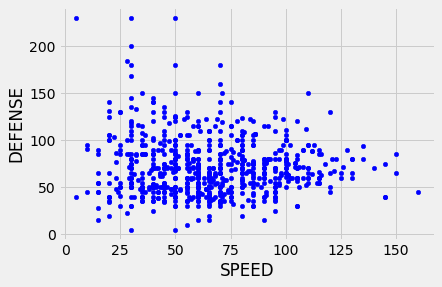

In [ ]:
non_legendary.plot(kind='scatter', x = 'SPEED', y='DEFENSE', color = 'blue' )

Here we can see that the defense exponentially decreases before hitting the defense ceiling of 100 where the Defense stat remains constant.

**In order to effectively analyze all stats, we will create a boxplot of the Attack stats for the first Type of a Pokemon.**

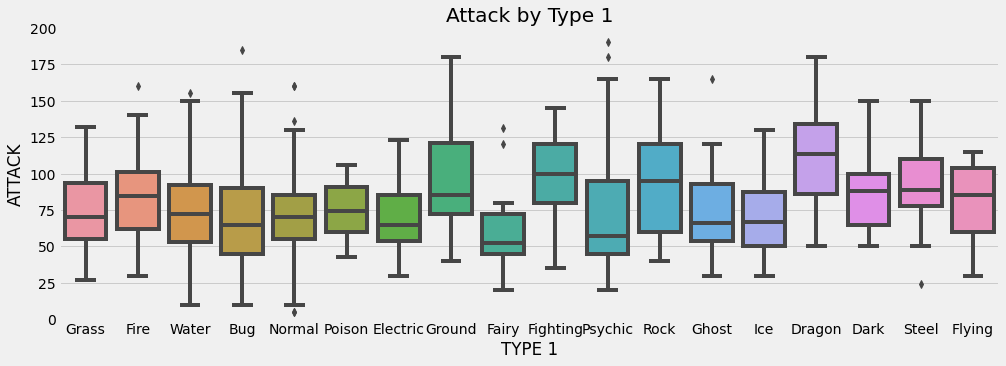

In [ ]:
plt.subplots(figsize = (15,5))
plt.title('Attack by Type 1')
sns.boxplot(x = "TYPE 1", y = "ATTACK",data = pokemon)
plt.ylim(0,200)
plt.show()

We can see that Dragon types have an advantage over other types since they overall have a higher attack in comparison with the other types of pokemons.

**Now lets see the boxplot for the second Type**

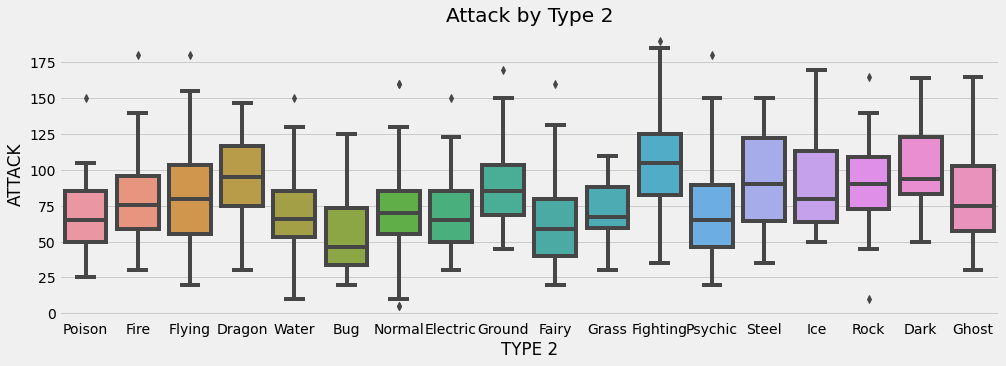

In [ ]:
plt.subplots(figsize = (15,5))
plt.title('Attack by Type 2')
sns.boxplot(x = "TYPE 2", y = "ATTACK",data=pokemon)
plt.show()

Pokemons that have a Fighting type for their second type have a higher attack to other types in comparison.

**Defense Stat of all Pokemons for first Type**

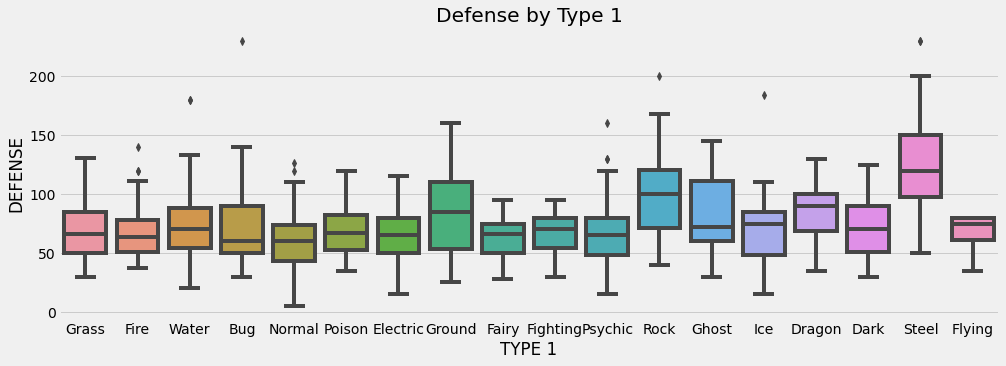

In [ ]:
plt.subplots(figsize = (15,5))
plt.title('Defense by Type 1')
sns.boxplot(x = "TYPE 1", y = "DEFENSE",data = pokemon)
plt.show()

The Defense by first type boxplot shows that Steel types tend to have a higher defense in comparison to Normal type Pokemons, which has the lowest defense stats.

**Now lets see the Defense stats for the second type of the Pokemon**

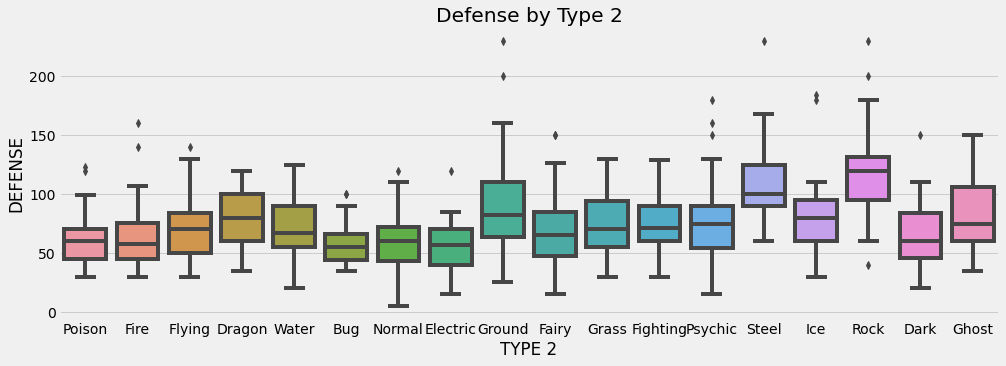

In [ ]:
plt.subplots(figsize = (15,5))
plt.title('Defense by Type 2')
sns.boxplot(x = "TYPE 2", y = "DEFENSE",data = pokemon)
plt.show()

Here we can see a shift from the Steel Type pokemons (The first type of the pokemons with the highest defense) to Rock types as their secondary type.

In [ ]:
#Lets create a function to compare different stats for convenience.
def boxplot(type, stat):
  plt.subplots(figsize = (15,5))
  plt.title( stat.lower().capitalize() + ' by ' + type.lower().capitalize())
  sns.boxplot(x = type, y = stat,data = pokemon)
  plt.show()

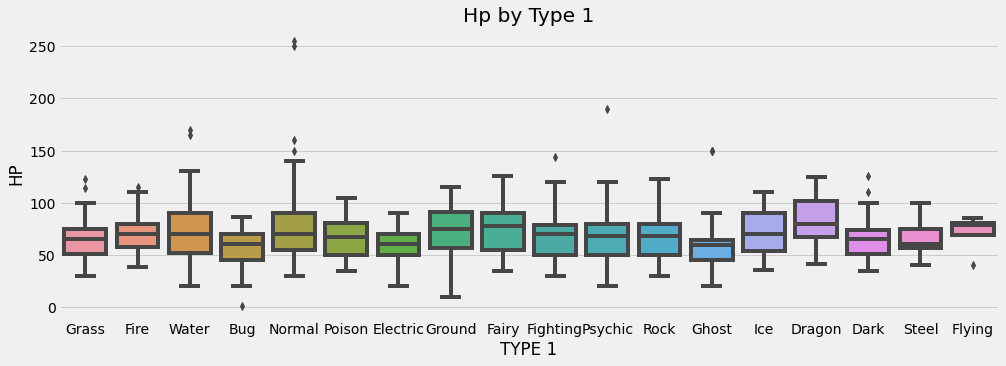

In [ ]:
#Function Test
boxplot('TYPE 1', 'HP')

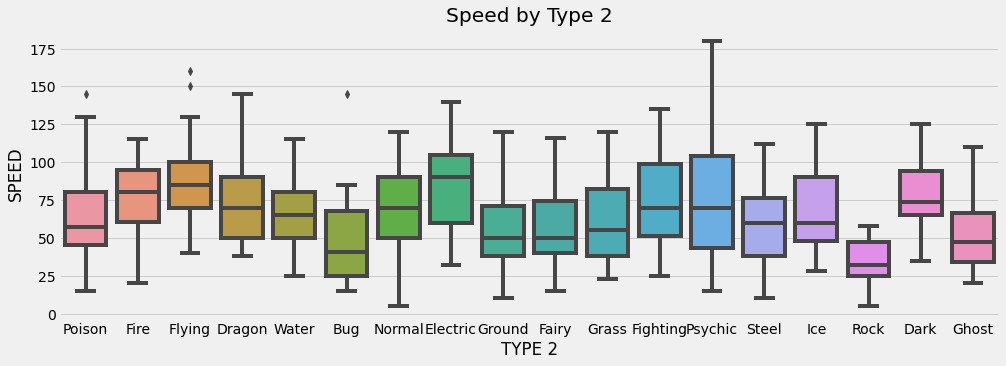

In [ ]:
boxplot('TYPE 2', 'SPEED')

**Lets visualize the strength of Pokemons by Type (Total stat)**

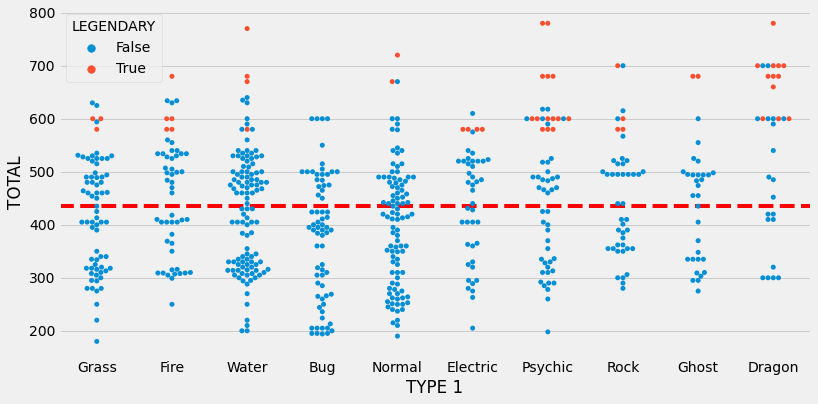

In [ ]:
plt.figure(figsize=(12,6))
top_types=pokemon['TYPE 1'].value_counts()[:10]
strongest_pokemons=pokemon[pokemon['TYPE 1'].isin(top_types.index)] 
sns.swarmplot(x='TYPE 1',y='TOTAL',data=strongest_pokemons,hue='LEGENDARY') 
# It is distributed by Type
plt.axhline(strongest_pokemons['TOTAL'].mean(),color='red',linestyle='dashed')
plt.show()

Based on this visualization we are able to see that Legendary pokemons have a higher total stats compared to non-legendary pokemons.

**Now lets compare the Number of Pokemons by Type and Generation**

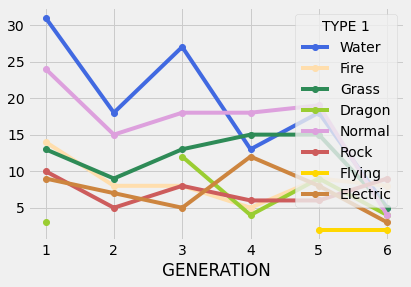

In [ ]:
type_1=pokemon.groupby(['GENERATION','TYPE 1']).count().reset_index()
type_1=type_1[['GENERATION','TYPE 1','TOTAL']]
type_1=type_1.pivot('GENERATION','TYPE 1','TOTAL')
type_1[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['royalblue', 'navajowhite', 'seagreen', 'yellowgreen', 'plum', 'indianred', 'gold', 'peru', 'slategray'],marker='o')

Based on this line graph we can see that Water type pokemons are the most common in generation 1, but has been declining every other generation. Whereas, Grass and Normal type showed a slight increase after a small decline from generation 2 to generation 5. Overall, the majority of the types are declining over time other than Fire and Rock type pokemons who seem to be pretty consistent.

**Comparison of Pokemons Throughout the Generation by Their Second Type**

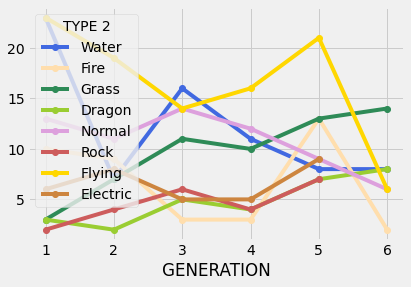

In [ ]:
type_1=pokemon.groupby(['GENERATION','TYPE 2']).count().reset_index()
type_1=type_1[['GENERATION','TYPE 2','TOTAL']]
type_1=type_1.pivot('GENERATION','TYPE 2','TOTAL')
type_1[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['royalblue', 'navajowhite', 'seagreen', 'yellowgreen', 'plum', 'indianred', 'gold', 'peru', 'slategray'],marker='o')

This line graph for the Pokemon's second type shows that Grass and Dragon type pokemons have been increasing throughout all the generations. 

###Data Visualization: Distribution of Pokemons Types###

**First let's check the attack distribution of Pokemons accross all of the generations.**

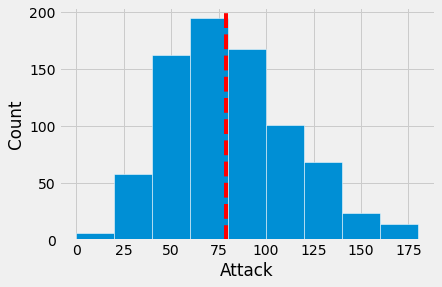

In [ ]:
bins=range(0,200,20)
plt.hist(pokemon["ATTACK"],bins,histtype="bar",rwidth=1.2, ec='w') 
plt.xlabel('Attack') 
plt.ylabel('Count') 
plt.plot()
plt.axvline(pokemon['ATTACK'].mean(),linestyle='dashed',color='red') 
plt.show()

This histogram shows the distribution of attacks for the Pokemon and the average value (red dotted line) is slightly larger than 75.

**Comparison of the Attack and Defense Stat between Fire/Water Pokemons** 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  after removing the cwd from sys.path.


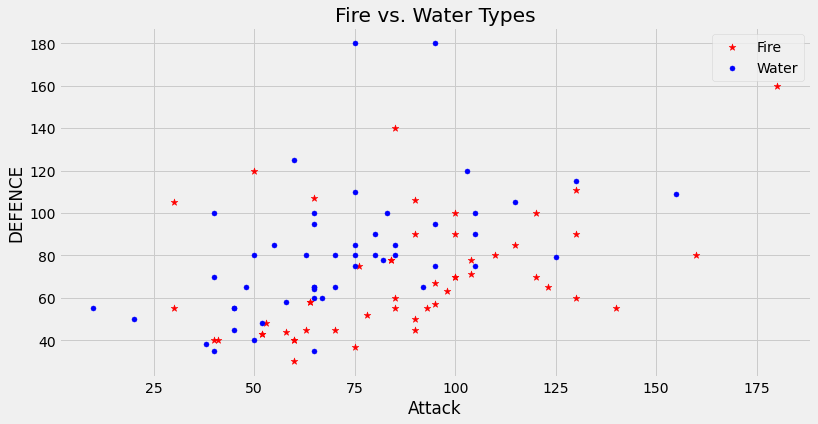

In [ ]:
fire=pokemon[(pokemon['TYPE 1']=='Fire') | ((pokemon['TYPE 2'])=="Fire")] 
water=pokemon[(pokemon['TYPE 1']=='Water') | ((pokemon['TYPE 2'])=="Water")]  
plt.scatter(fire.ATTACK.head(50),fire.DEFENSE.head(50),color='R',label='Fire',marker="*",s=50) 
plt.scatter(water.ATTACK.head(50),water.DEFENSE.head(50),color='B',label="Water",s=25)
plt.xlabel("Attack")
plt.ylabel("DEFENCE")
plt.title('Fire vs. Water Types')
plt.legend()
plt.plot()
fig=plt.gcf()  
fig.set_size_inches(12,6) 
plt.show()

This graph shows that fire type pokemons have a higher attack than water type pokemons, but they have a lower defense compared to water types.

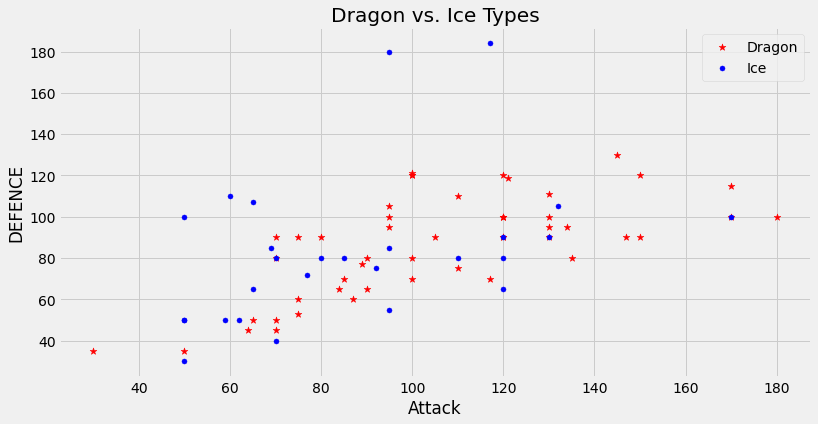

In [ ]:
fire=pokemon[(pokemon['TYPE 1']=='Dragon') | ((pokemon['TYPE 2'])=="Dragon")] 
water=pokemon[(pokemon['TYPE 1']=='Icer') | ((pokemon['TYPE 2'])=="Ice")]  
plt.scatter(fire.ATTACK.head(50),fire.DEFENSE.head(50),color='R',label='Dragon',marker="*",s=50) 
plt.scatter(water.ATTACK.head(50),water.DEFENSE.head(50),color='B',label="Ice",s=25)
plt.xlabel("Attack")
plt.ylabel("DEFENCE")
plt.title('Dragon vs. Ice Types')
plt.legend()
plt.plot()
fig=plt.gcf()  
fig.set_size_inches(12,6) 
plt.show()

Dragon types are stronger in both Attack and Defense in comparison to Ice Types.

**For convenience we will create a function to visualize the Attack and Defense between two types for comparison.**

In [ ]:
def comparison(type1,type2):
  fire=pokemon[(pokemon['TYPE 1'] == type1) | ((pokemon['TYPE 2'])==type1)] 
  water=pokemon[(pokemon['TYPE 1'] == type2) | ((pokemon['TYPE 2'])==type2)]  
  plt.scatter(fire.ATTACK.head(50),fire.DEFENSE.head(50),color='R',label=type1,marker="*",s=50) 
  plt.scatter(water.ATTACK.head(50),water.DEFENSE.head(50),color='B',label=type2,s=25)
  plt.xlabel("Attack")
  plt.ylabel("DEFENCE")
  plt.title(type1 +' vs. '+ type2)
  plt.legend()
  plt.plot()
  fig=plt.gcf()  
  fig.set_size_inches(12,6) 
  plt.show()

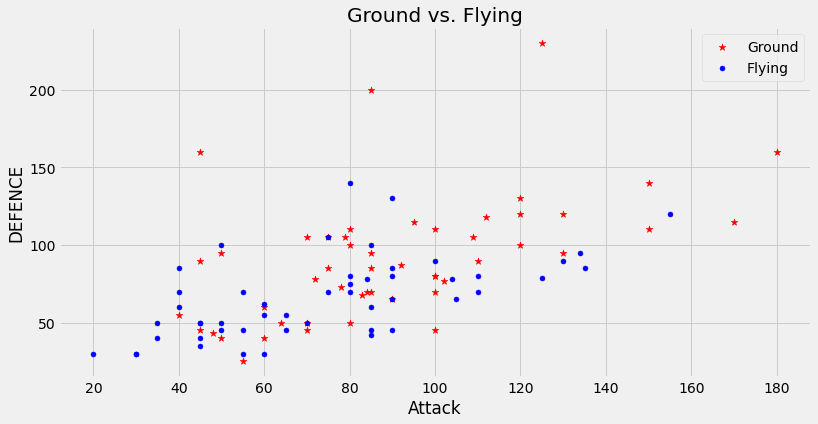

In [ ]:
#Function Tests
comparison('Ground','Flying')

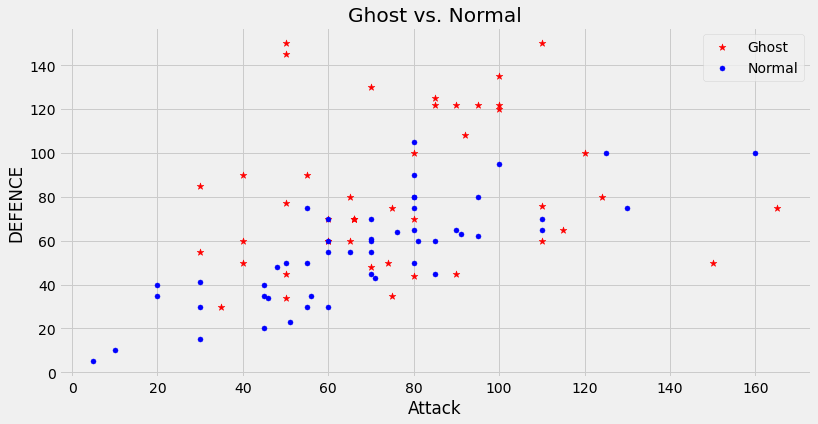

In [ ]:
comparison('Ghost', 'Normal')

**Distribution of Pokemon Types**

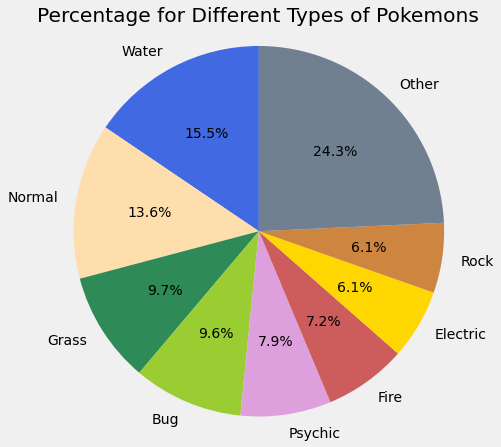

In [ ]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['royalblue', 'navajowhite', 'seagreen', 'yellowgreen', 'plum', 'indianred', 'gold', 'peru', 'slategray']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Percentage for Different Types of Pokemons")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

Based on this pie chart, the most common Pokemon type is Water followed by Normal, Grass, Bug, Psychic, Fire, and etc.

In [ ]:
pokemon

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
